In [1]:
import pandas as pd

# Load the uploaded CSV file
df = pd.read_csv('ico_incidents.csv')

# Show the first 5 rows of data
df.head()


,BI Reference,Year,Quarter,Data Subject Type,Data Type,Decision Taken,Incident Category,Incident Type,No. Data Subjects Affected,Sector,Time Taken to Report
0,BI1,2019,Qtr 1,Customers or prospective customers,Basic personal identifiers,No Further Action,Non Cyber,Loss/theft of device containing personal data,100 to 1k,Legal,24 hours to 72 hours
1,BI1,2019,Qtr 1,Customers or prospective customers,Economic and financial data,No Further Action,Non Cyber,Loss/theft of device containing personal data,100 to 1k,Legal,24 hours to 72 hours
2,BI1,2019,Qtr 1,Customers or prospective customers,Identification data,No Further Action,Non Cyber,Loss/theft of device containing personal data,100 to 1k,Legal,24 hours to 72 hours
3,BI10,2019,Qtr 1,Employees,Identification data,No Further Action,Non Cyber,Data emailed to incorrect recipient,1 to 9,Legal,More than 1 week
4,BI100,2019,Qtr 1,Customers or prospective customers,Basic personal identifiers,No Further Action,Non Cyber,Data posted or faxed to incorrect recipient,1 to 9,Legal,More than 1 week


In [2]:
# General information about the dataset
df.info()

# Summary statistics for all columns (including non-numeric ones)
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179788 entries, 0 to 179787
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   BI Reference                179788 non-null  object
 1   Year                        179788 non-null  int64 
 2   Quarter                     179788 non-null  object
 3   Data Subject Type           179788 non-null  object
 4   Data Type                   179788 non-null  object
 5   Decision Taken              179788 non-null  object
 6   Incident Category           179788 non-null  object
 7   Incident Type               179788 non-null  object
 8   No. Data Subjects Affected  179788 non-null  object
 9   Sector                      179788 non-null  object
 10  Time Taken to Report        179788 non-null  object
dtypes: int64(1), object(10)
memory usage: 15.1+ MB


,BI Reference,Year,Quarter,Data Subject Type,Data Type,Decision Taken,Incident Category,Incident Type,No. Data Subjects Affected,Sector,Time Taken to Report
count,179788,179788.000000,179788,179788,179788,179788,179788,179788,179788,179788,179788
unique,66845,NaN,4,9,16,5,2,22,7,23,4
top,BI49710,NaN,Qtr 1,Customers or prospective customers,Basic personal identifiers,Informal Action Taken,Non Cyber,Other non-cyber incident,1 to 9,Education and childcare,24 hours to 72 hours
freq,66,NaN,50620,41614,72986,81031,118378,26756,68485,30375,73200
mean,NaN,2021.700403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,1.893862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2020.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2022.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2023.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")




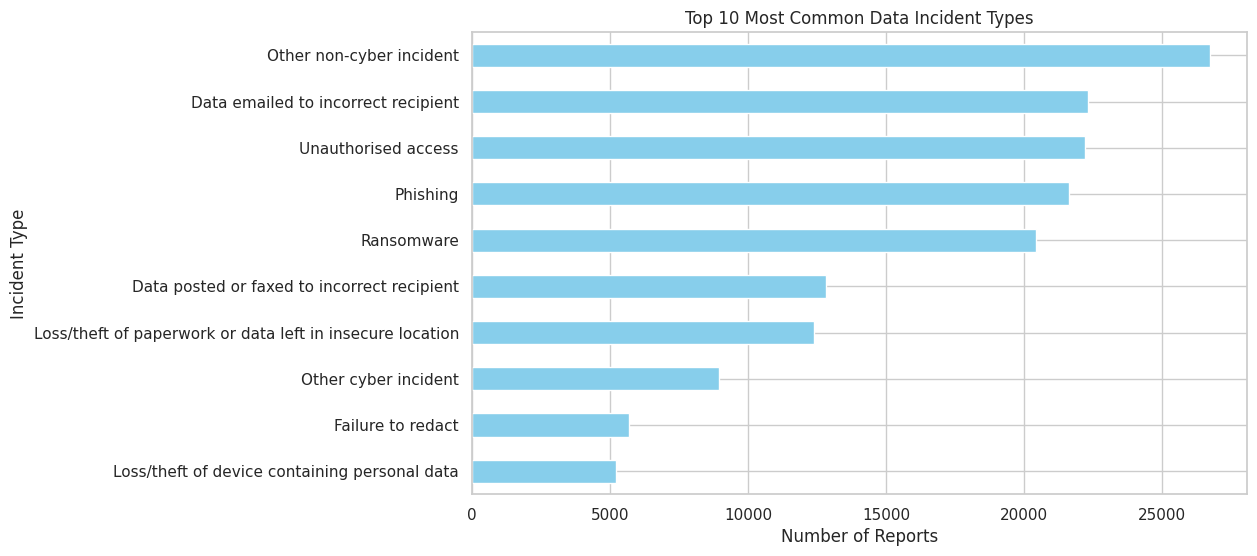

In [8]:
plt.figure(figsize=(10,6))
df['Incident Type'].value_counts().head(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Most Common Data Incident Types')
plt.xlabel('Number of Reports')
plt.ylabel('Incident Type')
plt.gca().invert_yaxis()
plt.show()


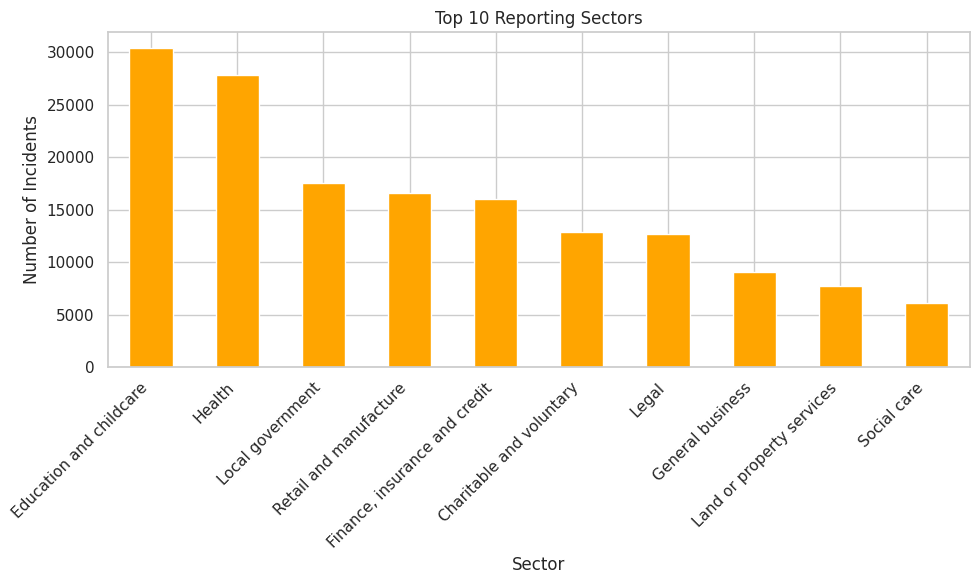

In [9]:
plt.figure(figsize=(10,6))
df['Sector'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Reporting Sectors')
plt.xlabel('Sector')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


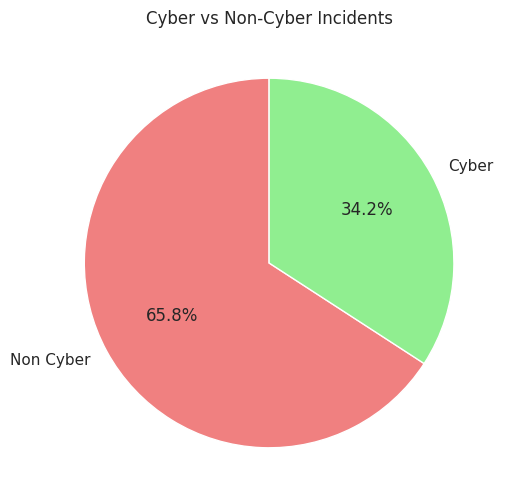

In [10]:
plt.figure(figsize=(6,6))
df['Incident Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightcoral','lightgreen'])
plt.title('Cyber vs Non-Cyber Incidents')
plt.ylabel('')
plt.show()


In [12]:
# Define the mapping dictionary for the ranges
ranges = {
    '1 to 9': 5,
    '10 to 99': 55,
    '100 to 1k': 550,
    '1k to 9.9k': 5000,
    '10k to 99k': 50000,
    '100k to 499k': 300000,
    '500k to 999k': 750000,
    '1M to 9.9M': 5000000,
    '10M+': 10000000,
    'Unknown': None
}

# Create a new numeric column based on the mapping
df['Num_Subjects_Affected'] = df['No. Data Subjects Affected'].map(ranges)

# Check the new column
df[['No. Data Subjects Affected', 'Num_Subjects_Affected']].head(10)


,No. Data Subjects Affected,Num_Subjects_Affected
0,100 to 1k,550.0
1,100 to 1k,550.0
2,100 to 1k,550.0
3,1 to 9,5.0
4,1 to 9,5.0
5,1 to 9,5.0
6,1 to 9,5.0
7,10 to 99,55.0
8,10 to 99,55.0
9,1 to 9,5.0


In [13]:
# Check for missing values in all columns
df.isnull().sum()


,0
BI Reference,0
Year,0
Quarter,0
Data Subject Type,0
Data Type,0
Decision Taken,0
Incident Category,0
Incident Type,0
No. Data Subjects Affected,0
Sector,0


In [15]:
median_value = df['Num_Subjects_Affected'].median()
df['Num_Subjects_Affected'].fillna(median_value, inplace=True)

# Check again missing values to confirm
df['Num_Subjects_Affected'].isnull().sum()


<ipython-input-15-3639131825>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Num_Subjects_Affected'].fillna(median_value, inplace=True)


np.int64(0)

In [16]:
median_value = df['Num_Subjects_Affected'].median()
df['Num_Subjects_Affected'] = df['Num_Subjects_Affected'].fillna(median_value)

# Confirm no missing values remain
print(df['Num_Subjects_Affected'].isnull().sum())


0


<ipython-input-17-476221585>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Year', palette='viridis')


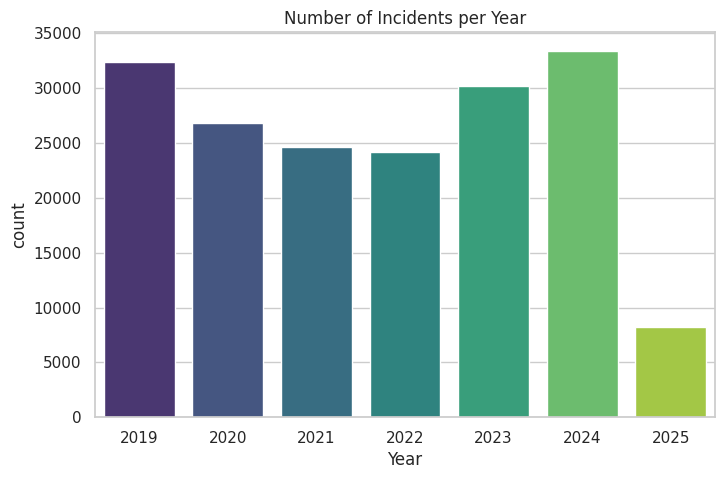

<ipython-input-17-476221585>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Quarter', palette='magma', order=['Qtr 1', 'Qtr 2', 'Qtr 3', 'Qtr 4'])


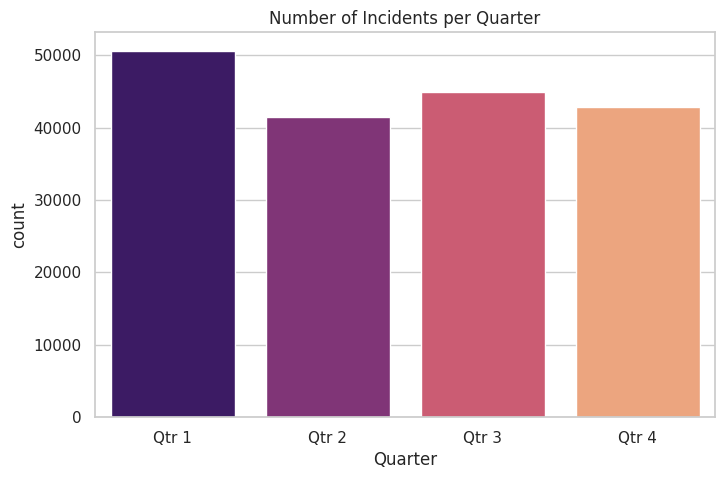

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot count of incidents per Year
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Year', palette='viridis')
plt.title('Number of Incidents per Year')
plt.show()

# Plot count of incidents per Quarter
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Quarter', palette='magma', order=['Qtr 1', 'Qtr 2', 'Qtr 3', 'Qtr 4'])
plt.title('Number of Incidents per Quarter')
plt.show()


<ipython-input-18-2842446106>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Incident Category', y='Num_Subjects_Affected', ci=None, palette='coolwarm')
<ipython-input-18-2842446106>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Incident Category', y='Num_Subjects_Affected', ci=None, palette='coolwarm')


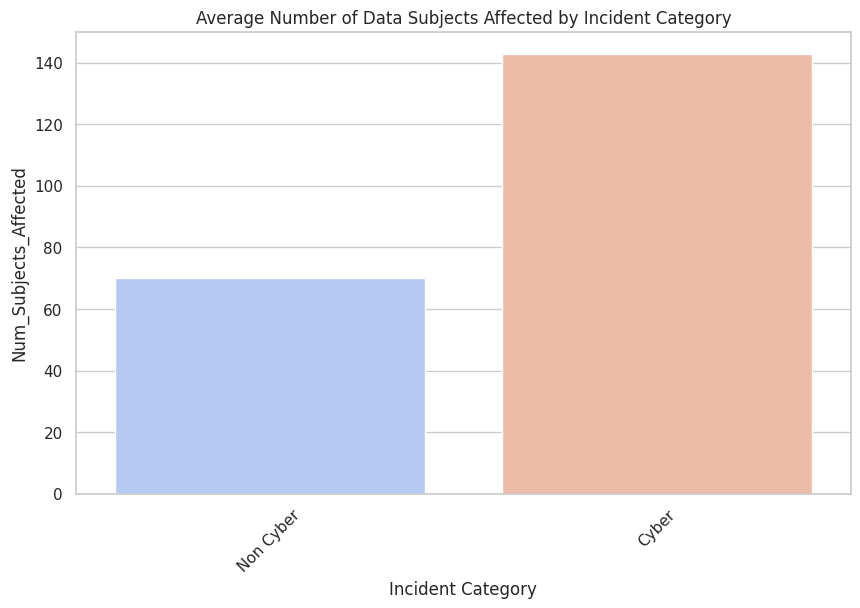

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Incident Category', y='Num_Subjects_Affected', ci=None, palette='coolwarm')
plt.title('Average Number of Data Subjects Affected by Incident Category')
plt.xticks(rotation=45)
plt.show()


<ipython-input-19-986264412>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Sector', order=df['Sector'].value_counts().index, palette='cubehelix')


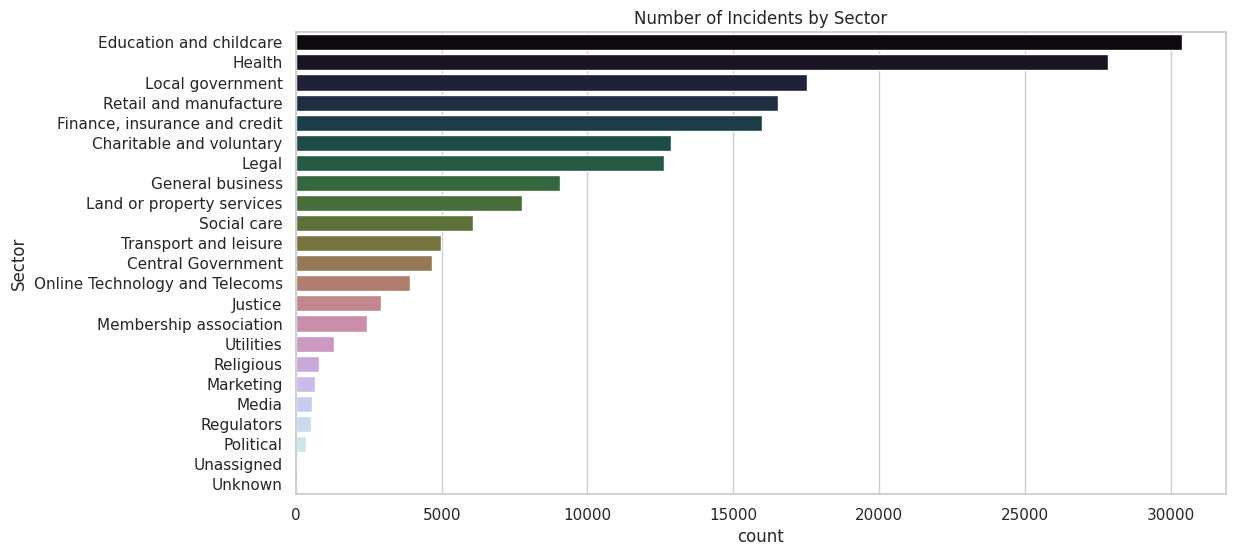

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, y='Sector', order=df['Sector'].value_counts().index, palette='cubehelix')
plt.title('Number of Incidents by Sector')
plt.show()


In [20]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Check for unique values in each categorical column
for col in ['Quarter', 'Data Subject Type', 'Data Type', 'Decision Taken', 'Incident Category', 'Incident Type', 'Sector', 'Time Taken to Report']:
    unique_vals = df[col].unique()
    print(f"\nUnique values in '{col}':\n{unique_vals}")

# Check for any unexpected or null values in categorical columns
print("\nNull values in dataset:\n", df.isnull().sum())


Number of duplicate rows: 0

Unique values in 'Quarter':
['Qtr 1' 'Qtr 2' 'Qtr 3' 'Qtr 4']

Unique values in 'Data Subject Type':
['Customers or prospective customers' 'Employees' 'Patients' 'Children'
 'Subscribers' 'Users' 'Unknown' 'Students' 'Vulnerable adults']

Unique values in 'Data Type':
['Basic personal identifiers' 'Economic and financial data'
 'Identification data' 'Health data' 'Location data' 'Official documents'
 'Data revealing racial or ethnic origin' 'Unknown'
 'Trade union membership' 'Gender Reassignment Data'
 'Religious or philosophical beliefs' 'Sexual orientation data'
 'Sex life data' 'Criminal convictions or offences'
 'Genetic or biometric data' 'Political opinions']

Unique values in 'Decision Taken':
['No Further Action' 'Investigation Pursued' 'Informal Action Taken'
 'Not Yet Assigned' 'Regulatory action taken']

Unique values in 'Incident Category':
['Non Cyber' 'Cyber']

Unique values in 'Incident Type':
['Loss/theft of device containing personal data'